In [11]:
import pandas as pd
# Load the 'spam' sheet
df = pd.read_excel("C:/Users/ishan/OOP/Spam Email Detection.xlsx", sheet_name='spam')

df = pd.read_excel(file_path, sheet_name='spam')

# Display the first few rows of the dataframe
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Excel file
file_path = "C:/Users/ishan/OOP/Spam Email Detection.xlsx"
xls = pd.ExcelFile(file_path)

# Load the 'spam' sheet
df = pd.read_excel(xls, sheet_name='spam')

# Drop unnecessary columns
df_cleaned = df[['v1', 'v2']]

# Rename columns for clarity
df_cleaned.columns = ['label', 'message']

# Check for missing values
missing_values = df_cleaned.isnull().sum()

# Drop rows with missing values
df_cleaned.dropna(inplace=True)

# Convert the "message" column to strings to ensure consistent processing
df_cleaned['message'] = df_cleaned['message'].astype(str)

# Display the first few rows of the cleaned dataframe
df_cleaned.head()


C:\Users\ishan\AppData\Local\Temp\ipykernel_1068\4163093129.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(inplace=True)
C:\Users\ishan\AppData\Local\Temp\ipykernel_1068\4163093129.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['message'] = df_cleaned['message'].astype(str)


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Text preprocessing and feature extraction
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df_cleaned['message'])
y = df_cleaned['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Naive Bayes': MultinomialNB(alpha=0.1),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    results[model_name] = {
        'accuracy': accuracy,
        'conf_matrix': conf_matrix,
        'class_report': class_report
    }

results


{'Naive Bayes': {'accuracy': 0.97847533632287,
  'conf_matrix': array([[953,  12],
         [ 12, 138]], dtype=int64),
  'class_report': '              precision    recall  f1-score   support\n\n         ham       0.99      0.99      0.99       965\n        spam       0.92      0.92      0.92       150\n\n    accuracy                           0.98      1115\n   macro avg       0.95      0.95      0.95      1115\nweighted avg       0.98      0.98      0.98      1115\n'},
 'Logistic Regression': {'accuracy': 0.9443946188340807,
  'conf_matrix': array([[962,   3],
         [ 59,  91]], dtype=int64),
  'class_report': '              precision    recall  f1-score   support\n\n         ham       0.94      1.00      0.97       965\n        spam       0.97      0.61      0.75       150\n\n    accuracy                           0.94      1115\n   macro avg       0.96      0.80      0.86      1115\nweighted avg       0.95      0.94      0.94      1115\n'},
 'SVM': {'accuracy': 0.972197309417040

In [14]:
# Use a reduced dataset for cross-validation
X_reduced, _, y_reduced, _ = train_test_split(X, y, test_size=0.8, random_state=42)

# Perform cross-validation for each model on the reduced dataset
cv_scores_nb_reduced = cross_val_score(models['Naive Bayes'], X_reduced, y_reduced, cv=5, scoring='accuracy')
nb_reduced_mean, nb_reduced_std = np.mean(cv_scores_nb_reduced), np.std(cv_scores_nb_reduced)

cv_scores_lr_reduced = cross_val_score(models['Logistic Regression'], X_reduced, y_reduced, cv=5, scoring='accuracy')
lr_reduced_mean, lr_reduced_std = np.mean(cv_scores_lr_reduced), np.std(cv_scores_lr_reduced)

cv_scores_svm_reduced = cross_val_score(models['SVM'], X_reduced, y_reduced, cv=5, scoring='accuracy')
svm_reduced_mean, svm_reduced_std = np.mean(cv_scores_svm_reduced), np.std(cv_scores_svm_reduced)

cv_scores_rf_reduced = cross_val_score(models['Random Forest'], X_reduced, y_reduced, cv=5, scoring='accuracy')
rf_reduced_mean, rf_reduced_std = np.mean(cv_scores_rf_reduced), np.std(cv_scores_rf_reduced)

cv_results_reduced = {
    'Naive Bayes': (nb_reduced_mean, nb_reduced_std),
    'Logistic Regression': (lr_reduced_mean, lr_reduced_std),
    'SVM': (svm_reduced_mean, svm_reduced_std),
    'Random Forest': (rf_reduced_mean, rf_reduced_std),
}

cv_results_reduced



{'Naive Bayes': (0.9730739708318182, 0.014174285777763373),
 'Logistic Regression': (0.8725326223084071, 0.004534173537726824),
 'SVM': (0.9111380438734699, 0.014532658522560034),
 'Random Forest': (0.9407667757443543, 0.014532654030357731)}

In [10]:
# Use a reduced dataset for cross-validation
X_reduced, _, y_reduced, _ = train_test_split(X, y, test_size=0.8, random_state=42)

# Perform cross-validation for each model on the reduced dataset
cv_scores_nb_reduced = cross_val_score(models['Naive Bayes'], X_reduced, y_reduced, cv=5, scoring='accuracy')
nb_reduced_mean, nb_reduced_std = np.mean(cv_scores_nb_reduced), np.std(cv_scores_nb_reduced)

cv_scores_lr_reduced = cross_val_score(models['Logistic Regression'], X_reduced, y_reduced, cv=5, scoring='accuracy')
lr_reduced_mean, lr_reduced_std = np.mean(cv_scores_lr_reduced), np.std(cv_scores_lr_reduced)

cv_scores_svm_reduced = cross_val_score(models['SVM'], X_reduced, y_reduced, cv=5, scoring='accuracy')
svm_reduced_mean, svm_reduced_std = np.mean(cv_scores_svm_reduced), np.std(cv_scores_svm_reduced)

cv_scores_rf_reduced = cross_val_score(models['Random Forest'], X_reduced, y_reduced, cv=5, scoring='accuracy')
rf_reduced_mean, rf_reduced_std = np.mean(cv_scores_rf_reduced), np.std(cv_scores_rf_reduced)

cv_results_reduced = {
    'Naive Bayes': (nb_reduced_mean, nb_reduced_std),
    'Logistic Regression': (lr_reduced_mean, lr_reduced_std),
    'SVM': (svm_reduced_mean, svm_reduced_std),
    'Random Forest': (rf_reduced_mean, rf_reduced_std),
}

cv_results_reduced


{'Naive Bayes': (0.9730739708318182, 0.014174285777763373),
 'Logistic Regression': (0.8725326223084071, 0.004534173537726824),
 'SVM': (0.9111380438734699, 0.014532658522560034),
 'Random Forest': (0.9416636367309014, 0.016746504892301846)}

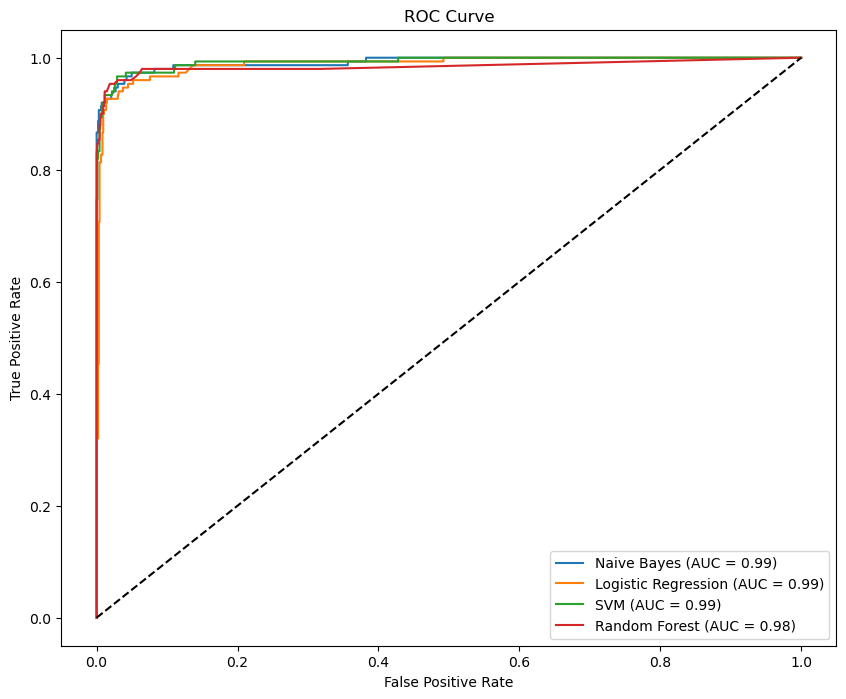

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for Naive Bayes
y_prob_nb = models['Naive Bayes'].predict_proba(X_test)[:, 1]

# Predict probabilities for Logistic Regression
y_prob_lr = models['Logistic Regression'].predict_proba(X_test)[:, 1]

# Predict probabilities for SVM (using decision function)
y_prob_svm = models['SVM'].decision_function(X_test)

# Predict probabilities for Random Forest
y_prob_rf = models['Random Forest'].predict_proba(X_test)[:, 1]

# Calculate ROC curves and AUC
fpr_nb, tpr_nb, _ = roc_curve(y_test.map({'ham': 0, 'spam': 1}), y_prob_nb)
auc_nb = roc_auc_score(y_test.map({'ham': 0, 'spam': 1}), y_prob_nb)

fpr_lr, tpr_lr, _ = roc_curve(y_test.map({'ham': 0, 'spam': 1}), y_prob_lr)
auc_lr = roc_auc_score(y_test.map({'ham': 0, 'spam': 1}), y_prob_lr)

fpr_svm, tpr_svm, _ = roc_curve(y_test.map({'ham': 0, 'spam': 1}), y_prob_svm)
auc_svm = roc_auc_score(y_test.map({'ham': 0, 'spam': 1}), y_prob_svm)

fpr_rf, tpr_rf, _ = roc_curve(y_test.map({'ham': 0, 'spam': 1}), y_prob_rf)
auc_rf = roc_auc_score(y_test.map({'ham': 0, 'spam': 1}), y_prob_rf)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


In [19]:
# Get feature importance from the Random Forest model
feature_importances = models['Random Forest'].feature_importances_

# Get feature names from the TF-IDF vectorizer
feature_names = tfidf.get_feature_names_out()

# Create a dataframe for feature importance
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

# Sort the dataframe by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Display the top 20 most important features
top_features = feature_importance_df.head(20)
top_features



,feature,importance
3254,free,0.027948
7677,txt,0.026508
8248,www,0.024841
1996,claim,0.023578
4932,mobile,0.023296
7707,uk,0.023169
7041,stop,0.015103
6196,reply,0.014554
607,50,0.014527
6537,service,0.014205


In [20]:
# Identify misclassified instances for Naive Bayes model
misclassified_nb = df_cleaned.iloc[y_test.index][y_test != models['Naive Bayes'].predict(X_test)]

# Identify misclassified instances for Random Forest model
misclassified_rf = df_cleaned.iloc[y_test.index][y_test != models['Random Forest'].predict(X_test)]

# Analyze the misclassified instances for Naive Bayes
misclassified_nb_analysis = misclassified_nb[['label', 'message']]

# Analyze the misclassified instances for Random Forest
misclassified_rf_analysis = misclassified_rf[['label', 'message']]

# Display a few examples of misclassified instances for both models
misclassified_nb_analysis.head(5), misclassified_rf_analysis.head(5)


(     label                                            message
 3504   ham             life alle mone,eppolum oru pole allalo
 4730   ham                          K:)eng rocking in ashes:)
 2317   ham  Waqt se pehle or naseeb se zyada kisi ko kuch ...
 3979  spam                                 ringtoneking 84484
 4539   ham  Urgh, coach hot, smells of chip fat! Thanks ag...,
      label                                            message
 683   spam  Hi I'm sue. I am 20 years old and work as a la...
 4700   ham                             I liked the new mobile
 4071  spam  Loans for any purpose even if you have Bad Cre...
 3979  spam                                 ringtoneking 84484
 712   spam              08714712388 between 10am-7pm Cost 10p)

In [23]:
# Identify misclassified instances for Logistic Regression model
misclassified_lr = df_cleaned.iloc[y_test.index][y_test != models['Logistic Regression'].predict(X_test)]

# Identify misclassified instances for Random Forest model
misclassified_rf = df_cleaned.iloc[y_test.index][y_test != models['Random Forest'].predict(X_test)]

# Analyze the misclassified instances for Logistic Regression
misclassified_lr_analysis = misclassified_lr[['label', 'message']]

# Analyze the misclassified instances for Random Forest
misclassified_rf_analysis = misclassified_rf[['label', 'message']]

# Display a few examples of misclassified instances for both models
misclassified_lr_analysis.head(5), misclassified_rf_analysis.head(5)


(     label                                            message
 1044  spam  We know someone who you know that fancies you....
 683   spam  Hi I'm sue. I am 20 years old and work as a la...
 4733  spam  Buy Space Invaders 4 a chance 2 win orig Arcad...
 4700   ham                             I liked the new mobile
 3494  spam  Wan2 win a Meet+Greet with Westlife 4 U or a m...,
      label                                            message
 683   spam  Hi I'm sue. I am 20 years old and work as a la...
 4700   ham                             I liked the new mobile
 4071  spam  Loans for any purpose even if you have Bad Cre...
 3979  spam                                 ringtoneking 84484
 712   spam              08714712388 between 10am-7pm Cost 10p)

In [24]:
# Manually set the parameters for Random Forest
optimized_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1
)

# Re-train the Logistic Regression with the best parameters from grid search
optimized_lr = LogisticRegression(C=1, solver='liblinear', max_iter=1000)

# Train and evaluate the optimized models
optimized_models = {
    'Optimized Logistic Regression': optimized_lr,
    'Optimized Random Forest': optimized_rf
}

results_optimized = {}
for model_name, model in optimized_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    results_optimized[model_name] = {
        'accuracy': accuracy,
        'conf_matrix': conf_matrix,
        'class_report': class_report
    }

results_optimized


{'Optimized Logistic Regression': {'accuracy': 0.9443946188340807,
  'conf_matrix': array([[962,   3],
         [ 59,  91]], dtype=int64),
  'class_report': '              precision    recall  f1-score   support\n\n         ham       0.94      1.00      0.97       965\n        spam       0.97      0.61      0.75       150\n\n    accuracy                           0.94      1115\n   macro avg       0.96      0.80      0.86      1115\nweighted avg       0.95      0.94      0.94      1115\n'},
 'Optimized Random Forest': {'accuracy': 0.9443946188340807,
  'conf_matrix': array([[965,   0],
         [ 62,  88]], dtype=int64),
  'class_report': '              precision    recall  f1-score   support\n\n         ham       0.94      1.00      0.97       965\n        spam       1.00      0.59      0.74       150\n\n    accuracy                           0.94      1115\n   macro avg       0.97      0.79      0.85      1115\nweighted avg       0.95      0.94      0.94      1115\n'}}

C:\Users\ishan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ishan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Optimized Model Results:

Optimized Logistic Regression:
Accuracy: 0.9865470852017937
Confusion Matrix:
[[964   1]
 [ 14 136]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       965
        spam       0.99      0.91      0.95       150

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115


Optimized Random Forest:
Accuracy: 0.9542600896860987
Confusion Matrix:
[[965   0]
 [ 51  99]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       965
        spam       1.00      0.66      0.80       150

    accuracy                           0.95      1115
   macro avg       0.97      0.83      0.88      1115
weighted avg       0.96      0.95      0.95      1115

